<br>
<CENTER><font size="+5" color='#000000'><b>Regression Linéaire avec Scipy</b></font></CENTER>


In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy import stats as st
from MyModule import Processing 
from MyModule import load_dataset as load
import statsmodels.api as sm
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')

``learning source`` : https://bayeswhu.github.io/teaching.html

In [15]:
df = load('Advertising.csv',shuffle=True)
proc = Processing(df)

In [16]:
proc.stat_missing_value()

Statistique données manquante                            colonnes: 5
---------------------------------------------------------------------------
            missing value % of missing value data dtypes  Obs
Unnamed: 0              0               0.0%       int64  200
TV                      0               0.0%     float64  200
radio                   0               0.0%     float64  200
newspaper               0               0.0%     float64  200
sales                   0               0.0%     float64  200


In [17]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,219.8,33.5,45.1,19.6
1,151.5,41.3,58.5,18.5
2,75.3,20.3,32.5,11.3
3,224.0,2.4,15.6,11.6
4,261.3,42.7,54.7,24.2


In [18]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [19]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


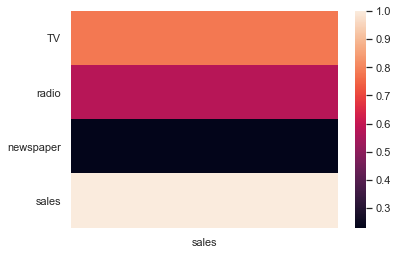

In [20]:
coef_price = [df['sales'].corr(df[c]) for c in df.select_dtypes(["int64","float64"])]
sns.heatmap(pd.DataFrame(data = np.array(coef_price),
                         columns=["sales"],
                         index=[c for c in df.select_dtypes(["int64","float64"])]))
plt.yticks(rotation=0);

METHODE DE REGRESSION N°1 : $y \sim \beta x + a$
=

Regression basé sur scipy à travers l'utilisation ``curve_fit``

In [21]:
class RegressionScipy(object):
    """
    ---------
    Attributs
    ---------
    guess : Integer
        Paramètre d'initialisation
    x : Float
        vecteur de variables exogène
    y : Float
        vecteur de variable endogène  
    --------
    Méthodes
    --------
    linear_reg() :
        Fournit une estimation des paramètres.
    diagnostic_modele():
        Fournit les diagnostic
    """  
    def __init__(self,guess,y,x): 
        """
        Initialisation des paramèttres
        """
        
        self.guess = guess
        self.x = x
        self.y = y
        
        
    def linear_reg(self,):
        """ 
        Methode permettant d'estimer les paramettre du modele:
        ---------
        Resultat
        ---------
        - coefficient exogène : β
        - intercept           : α
        """ 
        def f(x,a,b):
            return a*x+b
        params,cov = opt.curve_fit(f,self.x,self.y,self.guess)
        coef_exog = params[0]
        intercept = params[1]
        y_fit=f(self.x,coef_exog,intercept)
        self.y_fit = y_fit
        u = ((self.y - self.y_fit)**2).sum()
        v = ((self.y - self.y.mean())**2).sum()
        r = 1 - u/v
        self.r = r
        print("Les coefficients de regression obtenu sont :")
        for c,i in zip(['coefficient exogène','intercept'],[params[0].round(3),params[1].round(3)]):
            print("- {:<20} : {}".format(c,i))     
    def diagnostic_modele(self,):
        """ 
        Methode fournissant le diagnostic du modèle contenant
        --------
        Resultat
        --------
        - R²   : niveau de comprehention du phènomen par le modèle.
        - Le niveau d'erreur entre Observation et Prédiction. 
        """    
        error = np.round(((self.y_fit - self.y)**2).sum() / self.y.shape[0],3)
        self.error = error
        R = str(np.round(self.r*100,3))+'%'
    
        print("_"*65)
        print("DIAGNOSTIC DU MODELE")
        print("-"*65)
        print("R² = {}".format(R))
        print("Le niveau d'erreur entre Observation et Prédiction est : {}".format(error))
        print("_"*65)
    def obs_pred_plot(self,):
        corr = np.round(st.pearsonr(self.y,self.y_fit),3)
        erreur = self.error
        plt.figure()
        plt.scatter(self.y,self.y_fit)
        plt.xlabel('Observation')
        plt.ylabel('Prediction')
        plt.title("coefficient de corrélation = {}  |  p-val = {}  |  Erreur = {} ".format(corr[0],corr[1],erreur))
        plt.figure()
        plt.plot(figure=(6,4))
        plt.plot(self.x,self.y_fit,'r-')
        plt.scatter(self.x,self.y)
        plt.xlabel('exogene')
        plt.ylabel('endogene');

In [22]:
y = df.sales.values
x = df.TV.values

In [23]:
lr = RegressionScipy((0,0),y,x)

In [24]:
lr.linear_reg()

Les coefficients de regression obtenu sont :
- coefficient exogène  : 0.048
- intercept            : 7.033


In [25]:
lr.diagnostic_modele()

_________________________________________________________________
DIAGNOSTIC DU MODELE
-----------------------------------------------------------------
R² = 61.188%
Le niveau d'erreur entre Observation et Prédiction est : 10.513
_________________________________________________________________


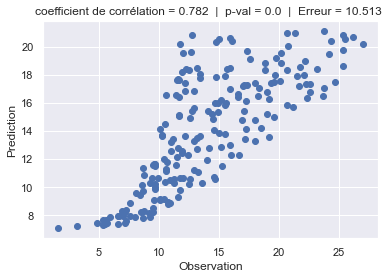

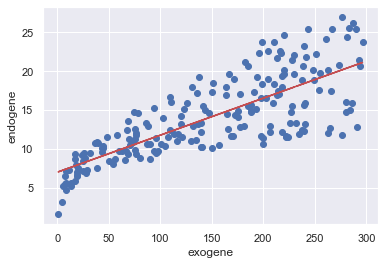

In [13]:
lr.obs_pred_plot()